<h1>Logistic regression</h1>

Let’s now talk about the classification problem. This is just like the regression
problem, except that the values $y$ we now want to predict take on only
a small number of discrete values. For now, we will focus on the binary
classification problem in which y can take on only two values, $0$ and $1$.
(Most of what we say here will also generalize to the multiple-class case.)
For instance, if we are trying to build a spam classifier for email, then $x^{(i)}$ may be some features of a piece of email, and y may be $1$ if it is a piece
of spam mail, and 0 otherwise. $0$ is also called the negative class, and $1$ the positive class, and they are sometimes also denoted by the symbols “$-$” and “$+$.” Given $x^{(i)}$, the corresponding $y^{(i)}$ is also called the label for the training example.


We could approach the classification problem ignoring the fact that $y$ is
discrete-valued, and use our old linear regression algorithm to try to predict
$y$ given $x$. However, it is easy to construct examples where this method
performs very poorly. Intuitively, it also doesn’t make sense for $h_{\theta}(x)$ to take
values larger than $1$ or smaller than $0$ when we know that $y\in{0, 1}$.
To fix this, let’s change the form for our hypotheses $h_{\theta}(x)$. We will choose

$$h_{\theta} = g(\theta^Tx) = \frac{1}{1+\exp{(-\theta^Tx)}}$$

where

$$g(z) = \frac{1}{1+\exp{(-z)}}$$

and $z = \theta^Tx$. $g$ is called the logistic function or the sigmoid function. Here is a plot
showing $g(z)$:


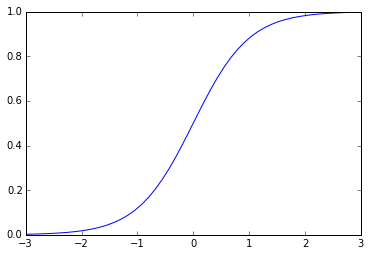

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import newaxis, r_, c_, mat
from numpy.linalg import *
from scipy import optimize

logistic = lambda h, beta: 1./(1 + np.exp(-beta * h))

W = 2
x = np.linspace(-3,3)

plt.plot(x, logistic(x, W))
plt.show()

Notice that $g(z)$ tends towards $1$ as $z\rightarrow \infty$, and $g(z)$ tends towards $0$ as
$z\rightarrow -\infty$. Moreover, $g(z)$, and hence also $h(x)$, is always bounded between
$0$ and $1$. As before, we are keeping the convention of letting $x_0 = 1$, so that we can write $\theta_0 + \sum_{i=1}^{m}\theta_ix_i = \theta^Tx$.  Before moving on, here’s a useful property of the derivative of the sigmoid function, which we write as $g'$:

\begin{align*}
g'(z) &= \frac{d}{dz}\frac{1}{1+\exp{(-z)}}\\
&= \frac{1}{(1+\exp{(-z))^2}}\exp(-z)\\
&= \frac{1}{1+\exp(-z)} . \big(1-\frac{1}{1+\exp(-z)}\big)\\
&= g(z).(1-g(z))
\end{align*}

So, given the logistic regression model, how do we fit $\theta$ for it?  Following
how we saw least squares regression could be derived as the maximum likelihood
estimator under a set of assumptions, let’s endow our classification
model with a set of probabilistic assumptions, and then fit the parameters
via maximum likelihood. Let us assume

\begin{align*}
P(y=1|x;\theta) &= h_{\theta}(x)\\
P(y=0|x;\theta) &= 1 - h_{\theta}(x)
\end{align*}

Note that this can be written more compactly as

$$P(y|x;\theta) = (h_{\theta}(x))^y \;(1 - h_{\theta}(x))^{1-y}$$

Assuming that the m training examples were generated independently, we
can then write down the likelihood of the parameters as

\begin{align*}
L(\theta) &= p(\hat{y}|X;\theta)\\
&= \prod_{i=1}^m p(y^{(i)}|x^{(i)};\theta)\\
&= \prod_{i=1}^m (h_{\theta}(x^{(i)}))^{y^{(i)}} \;(1 - h_{\theta}(x^{(i)}))^{1-y^{(i)}}
\end{align*}

As before, it will be easier to maximize the log likelihood:
\begin{align*}
\ell(\theta) &= log\;L(\theta)\\
&= \sum_{i=1}^m {y^{(i)}}log\;(h_{\theta}(x^{(i)})) + (1-y^{(i)})\;log\;(1 - h_{\theta}(x^{(i)}))
\end{align*}

How do we maximize the likelihood? Similar to our derivation in the case
of linear regression, we can use gradient ascent. Written in vectorial notation,
our updates will therefore be given by $\theta = \theta + \alpha\nabla_{\theta}\ell(\theta)$. (Note the positive
rather than negative sign in the update formula, since we’re maximizing,
rather than minimizing, a function now.) Let’s start by working with just
one training example $(x, y)$, and take derivatives to derive the stochastic
gradient ascent rule:

\begin{align*}
\frac{\partial}{\partial\theta_j}\ell(\theta) &= \frac{\partial}{\partial\theta} \big[{y}\;log\;(h_{\theta}(x)) + (1-y)\;log\;(1 - h_{\theta}(x))\big]\\
&= \big[ {y}\frac{1}{g(\theta^Tx)} - (1-y)\frac{1}{(1 - g(\theta^Tx))} \big]\;\frac{\partial}{\partial\theta} g(\theta^Tx)\\
&= \big[ {y}\frac{1}{g(\theta^Tx)} - (1-y)\frac{1}{(1 - g(\theta^Tx))} \big]\; (g(\theta^Tx).(1-g(\theta^Tx)))\frac{\partial}{\partial\theta}\theta^T x \\
&= \big[ {y}(1 - g(\theta^Tx)) - (1-y)g(\theta^Tx) \big]\;x_j\\
&= \big[y - yg(\theta^Tx) - g(\theta^Tx) + yg(\theta^Tx) \big]\;x_j\\
&= \big[y - h_{\theta}(x)\big]\;x_j
\end{align*}

Using the above equation, we derive the gradient descent algorithm for logistic regression:

\begin{align}
repeat \{\\
&\theta_j = \theta_j - \alpha \frac{1}{m}\sum_{i=1}^m(y^{(i)} - h_{\theta}(x^{(i)})).x^{(i)}_j\\
\}
\end{align}

#### Regularized logistic regression

\begin{align*}
min_{\theta}\;J(\theta)= \big[-\frac{1}{m} \sum_{i=1}^m {y^{(i)}}log\;(h_{\theta}(x^{(i)})) + (1-y^{(i)})\;log\;(1 - h_{\theta}(x^{(i)}))\big] + \frac{\lambda}{2m}\sum_{j=1}^m \theta_j^2
\end{align*}

\begin{align}
repeat \{\\
&\theta_0 = \theta_0 - \alpha \frac{1}{m}\sum_{i=1}^m(y^{(i)} - h_{\theta}(x^{(i)})).x^{(i)}_0\\
&\theta_j = \theta_j - \alpha\big[\frac{1}{m}\sum_{i=1}^m(y^{(i)} - h_{\theta}(x^{(i)})).x^{(i)}_j-\frac{\lambda}{m}\theta_j\big]\\
\}
\end{align}

### Numerical example

In [2]:
def plotData(X, y):
    #pos = (y.ravel() == 1).nonzero()
    #neg = (y.ravel() == 0).nonzero()
    pos = (y == 1).nonzero()[:1]
    neg = (y == 0).nonzero()[:1]
 
    plt.plot(X[pos, 0].T, X[pos, 1].T, 'k+', markeredgewidth=2, markersize=7)
    plt.plot(X[neg, 0].T, X[neg, 1].T, 'ko', markerfacecolor='r', markersize=7)
    
def sigmoid(z):
    g = 1./(1 + np.exp(-z.A))
    return g

def costFunction(X, y, theta):
    m = X.shape[0]
    predictions = sigmoid(X * c_[theta])
    J = 1./m * (-y.T.dot(np.log(predictions)) - (1-y).T.dot(np.log(1-predictions)))
    return J[0][0]
                         
def predict(theta, X):
    p = sigmoid(X * c_[theta]) >= 0.5
    return p

def plotDecisionBoundary(theta, X, y):
    plotData(X[:, 1:3], y)
 
    if X.shape[1] <= 3:
        plot_x = r_[X[:,2].min()-2,  X[:,2].max()+2]
        plot_y = (-1./theta[2]) * (theta[1]*plot_x + theta[0])
 
        plt.plot(plot_x, plot_y)
        plt.legend(['Admitted', 'Not admitted', 'Decision Boundary'])
        plt.axis([30, 100, 30, 100])
    else:
        pass

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.


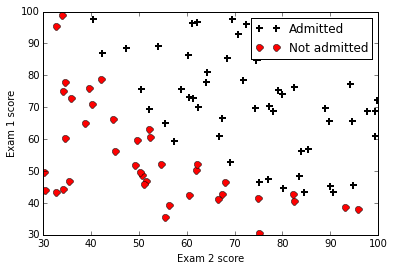

Cost at initial theta (zeros): 0.693147
Gradient at initial theta (zeros):
None
Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287
Cost at theta found by fminunc: 0.203498
theta: [-25.16130062   0.20623142   0.20147143]


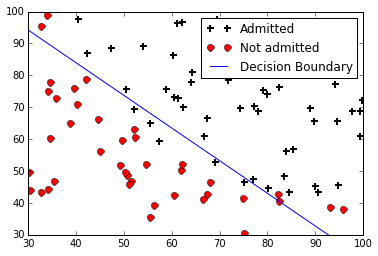

For a student with scores 45 and 85, we predict an admission probability of 0.776292
Train Accuracy: 89.0


In [5]:
if __name__ == '__main__':
    data = np.loadtxt('./Data/ex2data1.txt', delimiter=',')
    X = mat(c_[data[:, :2]])
    y = c_[data[:, 2]]

    # ============= Part 1: Plotting
 
    print ('Plotting data with + indicating (y = 1) examples and o ' \
          'indicating (y = 0) examples.')
 
    plotData(X, y)
    plt.ylabel('Exam 1 score')
    plt.xlabel('Exam 2 score')
    plt.legend(['Admitted', 'Not admitted'])
    plt.show()
  
    # ============= Part 2: Compute cost and gradient
 
    m, n = X.shape
 
    X = c_[np.ones(m), X]
 
    initial_theta = np.zeros(n+1)
 
    cost, grad = costFunction(X, y, initial_theta), None
 
    print ('Cost at initial theta (zeros): %f' % cost)
    print ('Gradient at initial theta (zeros):\n%s' % grad)
    
    # ============= Part 3: Optimizing using fminunc
 
    options = {'full_output': True, 'maxiter': 400}
 
    theta, cost, _, _, _ = optimize.fmin(lambda t: costFunction(X, y, t), initial_theta, **options)
 
    print ('Cost at theta found by fminunc: %f' % cost)
    print ('theta: %s' % theta)
 
    plotDecisionBoundary(theta, X, y)
    plt.show()
  
    # ============== Part 4: Predict and Accuracies
 
    prob = sigmoid(mat('1 45 85') * c_[theta])
    print ('For a student with scores 45 and 85, we predict an admission ' \
          'probability of %f' % prob)
 
    p = predict(theta, X)
    print ('Train Accuracy:', (p == y).mean() * 100)

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.


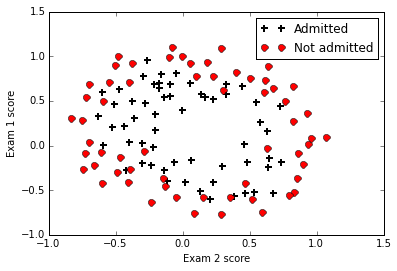

Cost at theta found by fminunc: 0.689878
theta: [ 0.00256058 -0.00320054  0.01367016 -0.04289583  0.00798865 -0.00327727
 -0.00314674 -0.00825688  0.00078225  0.0008783  -0.01427133  0.01869355
  0.03176705 -0.01853322 -0.01054655 -0.01071902  0.00533727  0.00027355
  0.00329653  0.00390918 -0.00300442 -0.00235317 -0.00501327  0.01094703
  0.01149867  0.00368632  0.00834568 -0.00574196]


In [60]:
def mapFeature(X1, X2):
    X1 = mat(X1)
    X2 = mat(X2)
 
    degree = 6
    out = [np.ones(X1.shape[0])]
    for i in range(1, degree+1):
        for j in range(0, i+1):
            #out = c_[out, X1.A**(i-j) * X2.A**j] # too slow, what's numpy way?
            out.append(np.power(X1.A, (i-j)) * (np.power(X2.A,j)))
    out = np.asarray(out[1:])
    return mat(out).T

def costReg(X, y, theta):
    m = X.shape[0]
    predictions = sigmoid(X * c_[theta])
    J = (1./m * (-y.T.dot(np.log(predictions)) - (1-y).T.dot(np.log(1-predictions)))) + 1./(2*m) * theta.dot(theta.T) 
    return J[0][0]

if __name__ == '__main__':
    data = np.loadtxt('./Data/ex2data2.txt', delimiter=',')
    X = mat(c_[data[:, :2]])
    y = c_[data[:, 2]]
 
    # ============= Part 1: Plotting
 
    print ('Plotting data with + indicating (y = 1) examples and o ' \
          'indicating (y = 0) examples.')
 
    plotData(X, y)
    plt.ylabel('Exam 1 score')
    plt.xlabel('Exam 2 score')
    plt.legend(['Admitted', 'Not admitted'])
    plt.show()
    
     # ============= Part 2: Compute cost and gradient
    x1 = X[:,0]
    x2 = X[:,1]
    X = mapFeature(x1, x2)
    
    #print(np.shape(x1))
    
    m, n = X.shape
 
    X = c_[np.ones(m), X]
    
    initial_theta = np.zeros(n+1)
 
    options = {'full_output': True, 'maxiter': 400}
 
    theta, cost, _, _, _ = optimize.fmin(lambda t: costReg(X, y, t), initial_theta, **options)
 
    print ('Cost at theta found by fminunc: %f' % cost)
    print ('theta: %s' % theta)

In [51]:
X1 = mat([1,2,3])
X2 = mat([4,5,6])

out = [np.ones(X1.shape[0])]
out.append(X1)
out.append(X2)
y = (np.asarray(out[1:]))
z = mat(y)
print(z[:,0])

[[1]
 [4]]
